In [2]:
import pandas as pd
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
data=df.iloc[:,3:]
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [13]:
import matplotlib.pyplot as plt

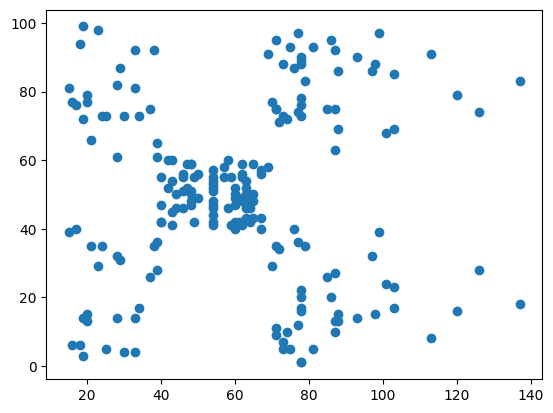

In [14]:
plt.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"])

In [17]:
from sklearn.cluster import KMeans, AgglomerativeClustering
sse=[]
for i in range(1,16):
    km=KMeans(n_clusters=i)
    km.fit_predict(data)
    sse.append(km.inertia_)
sse

[269981.28,
 181363.595959596,
 106348.3730621112,
 73679.78903948836,
 44448.45544793372,
 37442.24745037571,
 30227.606513152015,
 25022.485004530354,
 21850.16528258563,
 19669.710998301216,
 17595.28888108518,
 16104.51912660982,
 14343.354592792828,
 13246.472817460315,
 11681.923955860846]

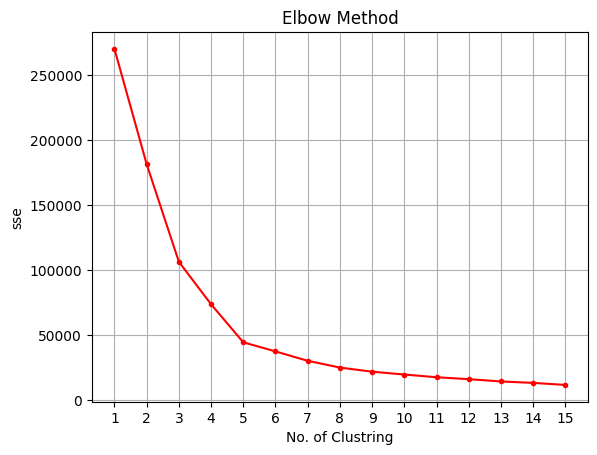

In [23]:
plt.title("Elbow Method")
plt.xlabel("No. of Clustring")
plt.ylabel("sse")
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16),sse,marker='.',color='red',)

In [25]:
km=KMeans(n_clusters=5)
label=km.fit_predict(data)
label

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4,
       3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 1, 2, 4, 2, 1, 2, 1, 2,
       4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

Text(0.5, 1.0, 'Clustered Data')

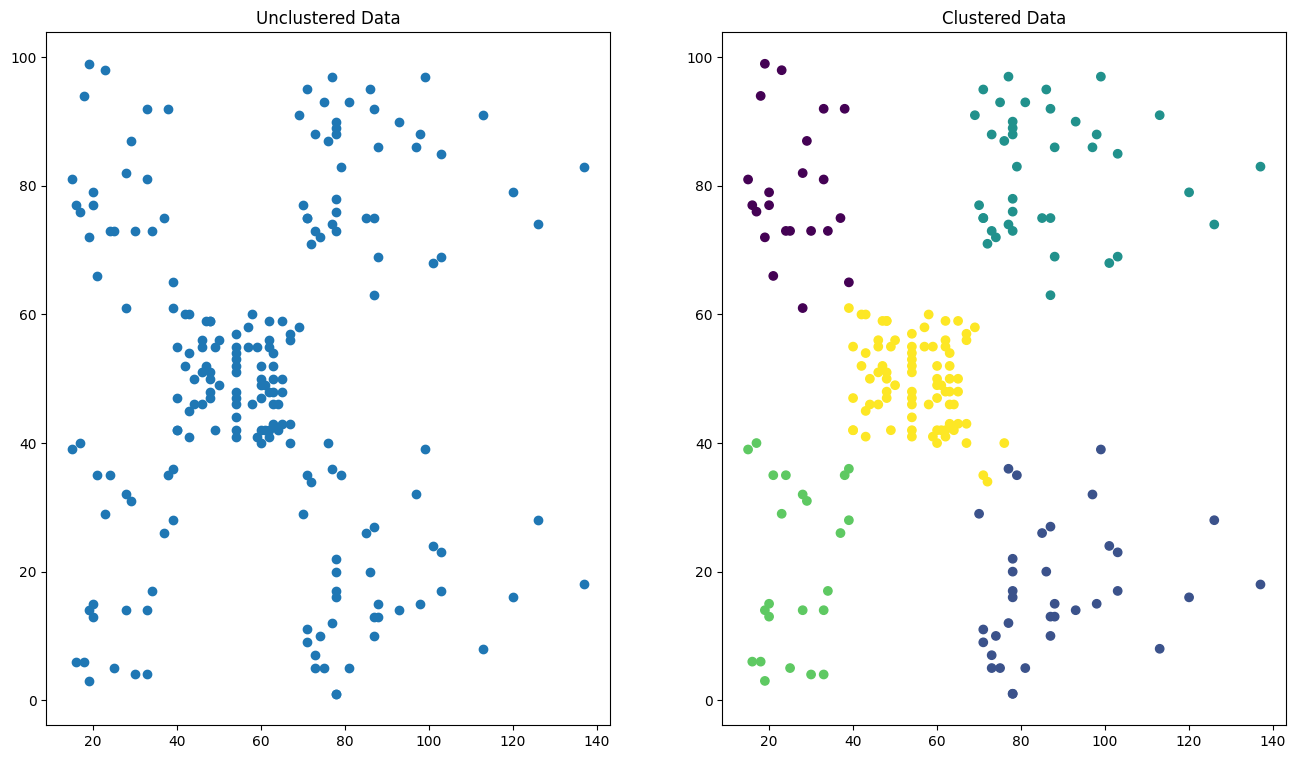

In [31]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"])
plt.title("Unclustered Data")

plt.subplot(1,2,2)
plt.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"],c=label)
plt.title("Clustered Data")


In [41]:
df[label==4]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
43,44,Female,31,39,61
46,47,Female,50,40,55
47,48,Female,27,40,47
48,49,Female,29,40,42
49,50,Female,31,40,42
...,...,...,...,...,...
121,122,Female,38,67,40
122,123,Female,40,69,58
126,127,Male,43,71,35
132,133,Female,25,72,34
